# 逻辑回归
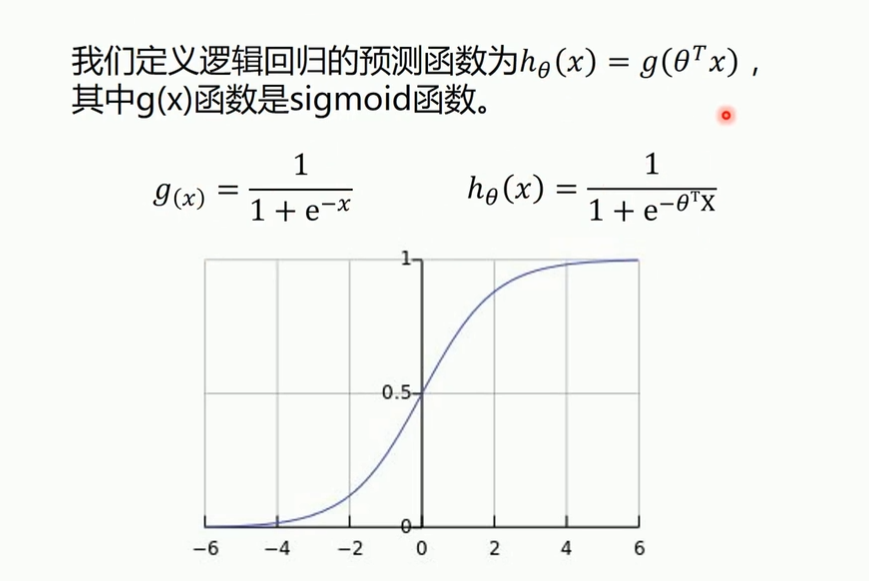


决策边界方程
$$ \theta ^TX=\theta _0+\theta _1x1+\theta _2x2

当然，上面的决策边界可以不是线性的，即决策边界是曲线

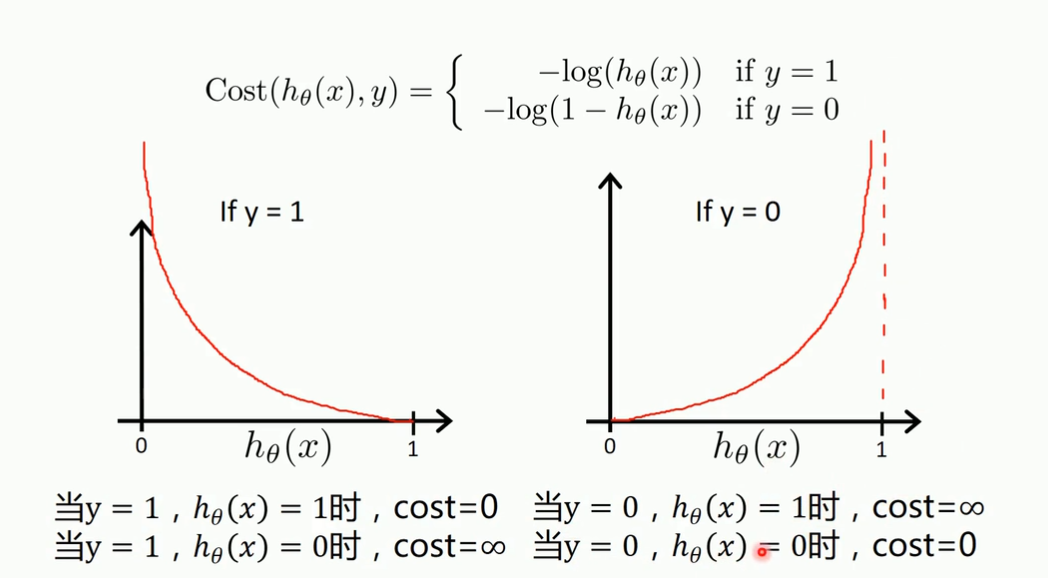
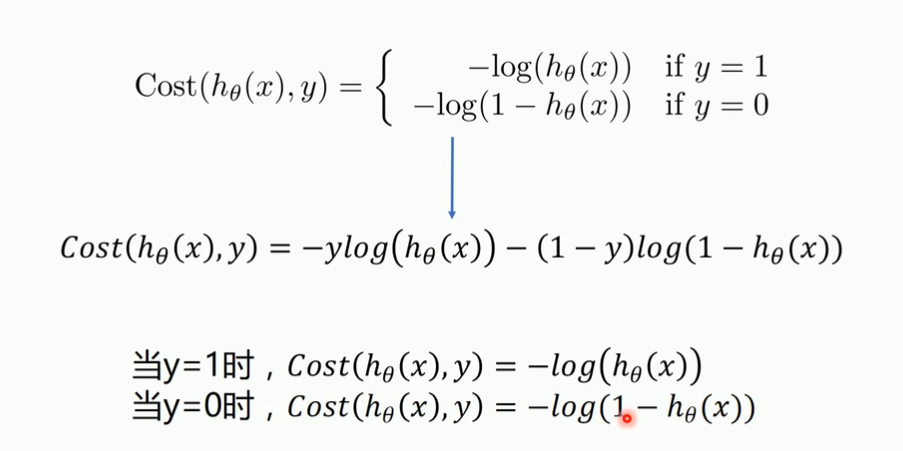

## 分类结果评估

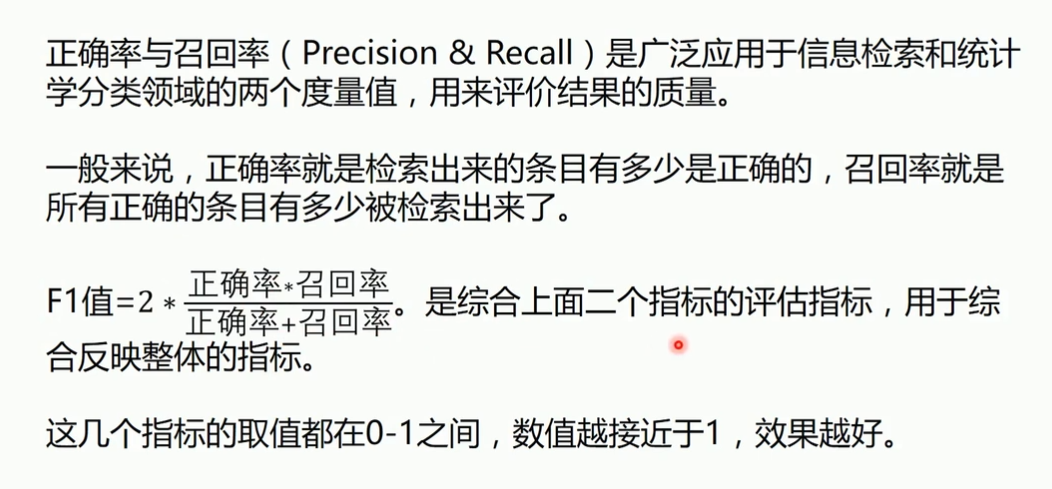
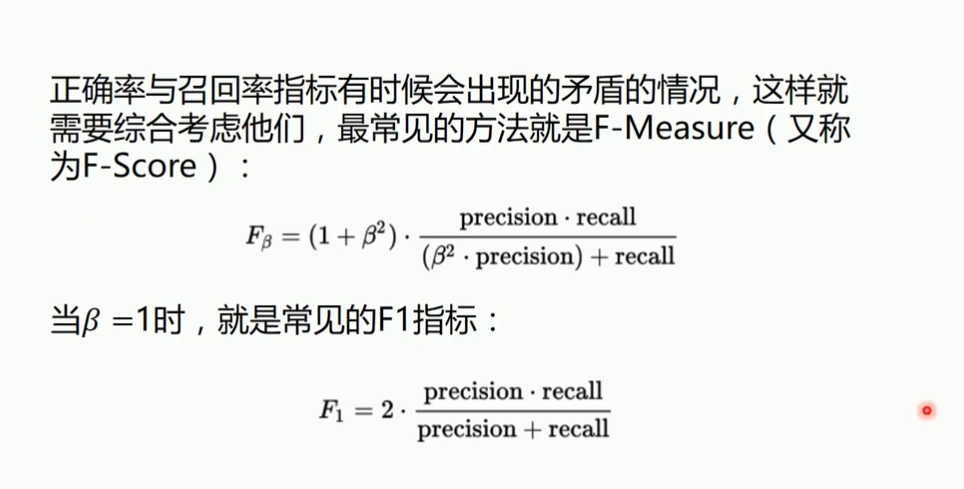

# 梯度下降 逻辑回归

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
# 数据是否需要标准化
scale = True

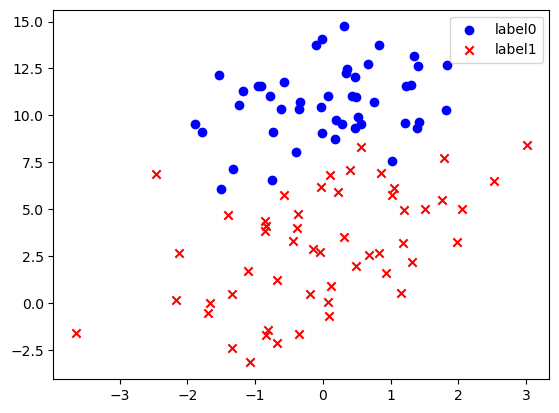

In [7]:
# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]
    
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    # 切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1]) 
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])

    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()

In [8]:
# 数据处理，添加偏置项
x_data = data[:,:-1]
y_data = data[:,-1]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
# 给样本添加偏置项
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)
print(X_data.shape)

(100, 2)
(100, 1)
(100, 3)


In [9]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad 
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [11]:
logistic=linear_model.LogisticRegression()
logistic.fit(x_data,y_data)


f:\anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()